## We want to create a simple ANN 
lets get the data


In [0]:
import numpy as np
X = np.asarray([[0,0],[0,1],[1,0],[1,1]])
y = np.asarray([1,0,0,1])
y = np.mat(y)
y=y.T 

## Lets visualize it

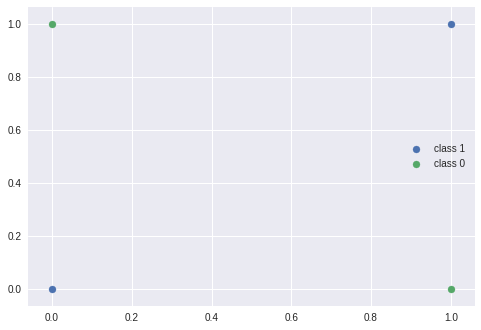

In [0]:
import matplotlib
import matplotlib.pyplot as plt

classA=[]
classB=[]
i=0
for index in y:
    if index==1.0:
        classA.append(X[i,:])
    else:
        classB.append(X[i, :])
    i+=1
a=plt.scatter(np.asarray(classA)[:,0],np.asarray(classA)[:,-1])

b=plt.scatter(np.asarray(classB)[:,0],np.asarray(classB)[:,-1])
plt.legend((a,b),('class 1','class 0'))

## Parameters of the ANN

In [0]:

def sigmoid(z):
  return 1/(1+np.exp(-z))

import random
neurons_in_hidden_layer=2

m,n = X.shape
W_h=np.random.rand(neurons_in_hidden_layer,n+1)
W_o=np.random.rand(1,neurons_in_hidden_layer+1)

#lets feed forward

ones = np.ones((X.shape[0], 1))
ext_X = np.concatenate((ones, X), axis=1)
ext_X = np.mat(ext_X)
 

print(W_h.shape)
print(W_o.shape)
print(ext_X.shape)
print(ext_X)

(2, 3)
(1, 3)
(4, 3)
[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]


## Lets see the outputs

In [0]:
h_o=sigmoid(ext_X*W_h.T)
print(h_o)

# now pass this output to output layer again
ones = np.ones((h_o.shape[0], 1))
ext_ho = np.concatenate((ones, h_o), axis=1)
print(ext_ho)
print(ext_ho.shape)
yhat=sigmoid(ext_ho*W_o.T)
print(yhat)

[[0.55226781 0.51502658]
 [0.60675403 0.62482397]
 [0.57401432 0.56356235]
 [0.62763844 0.66942436]]
[[1.         0.55226781 0.51502658]
 [1.         0.60675403 0.62482397]
 [1.         0.57401432 0.56356235]
 [1.         0.62763844 0.66942436]]
(4, 3)
[[0.73036482]
 [0.73705736]
 [0.73314037]
 [0.73964219]]


## Lets put this into a function

In [0]:
def feedforward(X,W_h,W_o):
  ones = np.ones((X.shape[0], 1))
  ext_X = np.concatenate((ones, X), axis=1)
  ext_X = np.mat(ext_X)
  
  h_o=sigmoid(ext_X*W_h.T)
  ones = np.ones((h_o.shape[0], 1))
  ext_ho = np.concatenate((ones, h_o), axis=1)
  yhat=sigmoid(ext_ho*W_o.T)
  return yhat

In [0]:
feedforward(X,W_h,W_o)

matrix([[0.73036482],
        [0.73705736],
        [0.73314037],
        [0.73964219]])

## its time to learn!

In [0]:
def learn_weights(X,y):
  
  neurons_in_hidden_layer=2
  m,n = X.shape
  
  
  W_h=np.random.rand(neurons_in_hidden_layer,n+1)
  W_o=np.random.rand(1,neurons_in_hidden_layer+1)
  
  
  ones = np.ones((X.shape[0], 1))
  ext_X = np.concatenate((ones, X), axis=1)
  ext_X = np.mat(ext_X)
  
  y=np.mat(y)
  y=y
  
  #learning rate
  alpha=0.9
  
  maxIter=10000
  
  for i in range(maxIter):
    # this is the loop of gradient descent
    
    # STEP 1: FEED FORWARD AND GET ALL OUTPUTS OF THE NETWORK
    h_o=sigmoid(ext_X*W_h.T)
    ones = np.ones((h_o.shape[0], 1))
    ext_ho = np.concatenate((ones, h_o), axis=1)
    yhat=sigmoid(ext_ho*W_o.T)
    
    
    # STEP 2: CALCULATE ERROR
    e_o = y-yhat
    
    # MULTIPLY BY LAST LAYER INPUTS TO GET THE SLOPE
    der_o=np.multiply(yhat, 1-yhat)
    del_o=np.multiply(der_o,e_o)
    
    #print(del_o.shape)
    #print(ext_ho.shape)
    slope_o=del_o.T*ext_ho
    #print(slope_o.shape)
   
    
    # we will use slope_o to update the weights in output layer
    
    # lets calculate dels in the hidden layer
    der_h=np.multiply(h_o,1-h_o)
    #print(der_h)    
    
    del_h_int=np.multiply(der_h,del_o)
    #print(del_h_int)
    #print(W_o[0,1:])
    del_h=np.multiply(del_h_int,W_o[0,1:])
    #print(del_h)
    slope_h=del_h.T*ext_X
    #print(slope_h)
    #print(W_h.T)
    
    # now update the weights
    W_o = W_o + slope_o*alpha
    W_h = W_h + slope_h*alpha
    
  return [W_o,W_h]

output,hidden=learn_weights(X,y)
yhat=feedforward(X,hidden,output)
print(yhat)
print(W_o)
print(W_h)
 
  

[[0.98616497]
 [0.01184287]
 [0.0118299 ]
 [0.98781999]]
[[0.70863612 0.42858202 0.09930771]]
[[0.20983784 0.08841077 0.22385034]
 [0.06012441 0.19550804 0.44995022]]
